In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
import sklearn

import TP3_helper_function_dont_look

In [2]:
### uncomment the line below to get figures in pop-up windows, that you can then drag and turn around 
### (nice to see 3D plots correctly)
# %matplotlib qt  
### disable the line above if you have errors, or if you prefer figures to remain 
### embedded in the notebook (no pop-ups)

In [3]:
def plot_data(X, y):
    plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
    plt.scatter(X[:, 0], X[:, 1], c=y, s = 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    #plt.legend()

In [4]:
X, yregress, yclassif = TP3_helper_function_dont_look.getData(42)
X_test, yregress_test, yclassif_test = TP3_helper_function_dont_look.getData(41, 1000)

### Note:

In this TP, we sometimes use a very large amount of test data, so as to get a "true value" (not really "true", but quite converged) for the test error. This is useful pedagogically, to understand how $N_{train}$ or hyper-parameters can impact the quality of the model that is learned. 

In real life, of course, you generally use more data for training than for testing, since it's better to improve the results (increase $N_{train}$) than to improve the accuracy of measurement of the (test) error (increase $N_{test}$).

# Part 1: classification of the XOR data set

You're going to code your own feature map, so as to classify the XOR dataset.

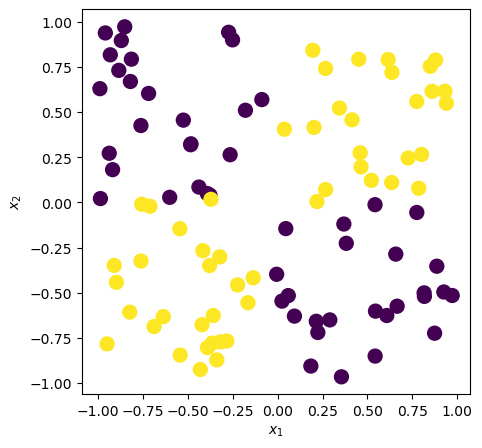

In [5]:
plot_data(X, yclassif)

In [6]:
## the default feature map is the identity function
def defaultFeatureMap(X):
    return X

In [7]:
## a function to plot the domains of prediction (for a classification)
## the idea is to grid the (2D) pre-feature-map space with a mesh, and 
## display the predicted class with a color, in each little square of the mesh.
def plot_boundary(clf, X, y, featureMap=None):
    if featureMap == None:
        featureMap = defaultFeatureMap
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    hx = hy = 0.002 ## grid mesh size
    hx = (x_max-x_min)/200 ## grid mesh size
    hy = (y_max-y_min)/200 ## grid mesh size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                         np.arange(y_min, y_max, hy))
    Z = clf.predict(featureMap(np.c_[xx.ravel(), yy.ravel()])) ## prediction value by zone
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
    plt.title('score : ' + str(clf.score(featureMap(X),y)))    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s = 10)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()

## Reminder: full-batch Perceptron (linear classifier)

Or actually, we may simply call it linear classifier.

## Question 1.1 : Complete the class that is provided below

Then run it on your data, `X`, `yclassif`

### About python classes

- members of the class are accessed with the syntax `self.myMemberObject` (regardless of its nature, function, variable, sub-class, etc).
- functions (methods) of the class always take the argument `self` as first argument. Look at the example of the two lines of code, `def initializeWeights(self,D):` and  `w = self.initializeWeights(D)`. You see that `self` does not need to be passed as an argument because it's already present when we do `self.MyFunction`
- the `__init__` function initializes (instanciates) an instance of the class with some parameters (default values or passed as arguments of the constructor when a instance is created)

You can also check out what is expected from a typical sklearn class by looking at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression or  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [8]:
class classLinearClassifierFullBatch():

    def __init__(self, eta=0.001, maxIter=100, seed=42, verbose=True, fit_intercept=True):
        self.eta = eta
        self.maxIter = maxIter
        self.seed = seed
        self.w = None # at the start, it's undefined
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def initializeWeights(self,D):
        pass
    
    def fit(self, Xraw, y):
        pass
    
    def predict(self,Xraw):
        return ??
    
    def score(self, X, y):
        return ??
    

SyntaxError: invalid syntax (3024940319.py, line 18)

In [ ]:
# note that the order of the parameters does not matter (since they have keywords)
clf = classLinearClassifierFullBatch(eta=0.01, seed=41, maxIter=3000) 
clf.fit(??)

In [ ]:
plot_boundary(clf, X, yclassif)

## Question 1.2 : 

Are you happy with this classification ?

What can be done to improve it ?

### Answer: 


## Question 1.3 : make your own feature map ! 

- Define a feature map. For instance, you may use a polynomial feature map. Go back to the lecture notes if you are out of ideas. Simpler is better ! (at least for today)
- create a new vector $X_f = \phi(X)$, i.e. the transform of your dataset through this feature-map
- use it as input in our LINEAR classification model
- look at the score and plot the result using plot_boundary()

Advice: create a new instance of your classifier class, so as to not confuse 
- the fitted model which expects the raw data and 
- the fitted model which expects the augmented (featurized) data

If we did things right, we do not need to change our model (the whole python class) AT ALL.

In [ ]:
def featureMap(X):
    return ??

### Remark: check carefully that your data after applying the feature map has the reasonable shape. If not, transpose it, or do something with your function

In [ ]:
featureMap(X).shape

In [ ]:
clf2 = classLinearClassifierFullBatch(eta=0.003, seed=41, maxIter=30000) # order of parameters does not matter
??

In [ ]:
plot_boundary(clf2, X, yclassif, featureMap)

## Question 1.4 : are you happy with this classification ?


## Answer: 


## Question 1.5: compute the test error/score,and display the results for the test set

In [ ]:
plot_boundary(clf2, X_test, yclassif_test, featureMap)

## Question 1.6:

build the *learning curve* of the problem.

You may choose an exponentially growing number of training examples, such as `Ntrains = [10,30,100,300,1000, 3000, 10000]`, or `Ntrains = [2**k for k in range(10)]` and a large number of test examples, for the sake of having a precise estimation of the test error. You should probably use log-log or semilog- plots.
    

In [ ]:
Ntrains = [2**k for k in range(10)]

clf2 = classLinearClassifierFullBatch(eta=0.01, seed=41, maxIter=30000, verbose=False) # order of parameters does not matter
score_train =[]
score_test  =[]
??
for Ntrain in Ntrains:
    X, yregress, yclassif = TP3_helper_function_dont_look.getData(42, Ntrain)
    ??

In [ ]:
plt.semilogx(??)

plt.figure()
plt.loglog(??)

# Part 2: same thing but with regression !

Now we re-do the same thing but for a regression task.
The data is `X, yregress`

In [9]:

import TP3_helper_function_dont_look
X, yregress, yclassif = TP3_helper_function_dont_look.getData(42)
X_test, yregress_test, yclassif_test = TP3_helper_function_dont_look.getData(41, 1000)

In [ ]:
X[:5,:], yregress[:5]

In [ ]:
def twod_scatter_plot_colored_value(X, y):
    plt.scatter(X[:,0], X[:,1], s=10, c=y, cmap='jet')
    plt.colorbar()

In [ ]:
twod_scatter_plot_colored_value(X, yregress)

In [ ]:
## another way to plot, less legible in my opinion
fig = plt.figure()
ax = plt.axes(projection="3d")
#Labeling
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Z Axes')
ax.plot3D(X[:,0], X[:,1], yregress, ls='', marker='o')
plt.show()

## Question 2.1 : code your regressor !

define a class `classLinearRegressorFullBatch`  that will perform regression, in a similar fashion as `classLinearClassifierFullBatch` did perform a (binary) classification.
There should be only 2,3 or 4 lines at most to change.

Remember:
- the model and cost function are essentially (or exactly?) the same
- the prediction now takes in values in $\mathbb{R}$
- the score is now defined not as the number of correctly classified points, but as the Mean Squared Error. In other terms, it's essentially equal to the Loss.

In [ ]:
def plot_prediction_regress(reg, X, y, featureMap=None):  
    if featureMap == None:
        featureMap = defaultFeatureMap
    h = 0.02 ## grid mesh size
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    fig = plt.figure()
    Z = reg.predict(featureMap(np.c_[xx.ravel(), yy.ravel()])) ## prediction value by zone
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z)
    plt.colorbar()
    twod_scatter_plot_colored_value(X, y)


In [ ]:
#
#the other kind of plot 
def plot_prediction_regress_2(reg, X, y, featureMap=None):  
    if featureMap == None:
        featureMap = defaultFeatureMap
    h = 0.02 ## grid mesh size
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    Z = reg.predict(featureMap(np.c_[xx.ravel(), yy.ravel()])) ## prediction value by zone
    Z = Z.reshape(xx.shape)
    plt.title('score : ' + str(reg.score(featureMap(X),y)))  
    ax.plot3D(xx.flatten(), yy.flatten(), Z.flatten(),marker='o', ls='',color="green")
    ax.scatter(X[:, 0], X[:, 1], y, c=y, s = 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()

In [ ]:
class classLinearRegressorFullBatch():

    def __init__(self, eta=0.001, maxIter=100, seed=42, verbose=True, fit_intercept=True):
        self.eta = eta
        self.maxIter = maxIter
        self.seed = seed
        self.w = None # at the start, it's undefined
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def initializeWeights(self,D):
        pass
    
    def fit(self, Xraw, y):
        pass
    
    def predict(self,Xraw):
        return ??
    
    def score(self, X, y):
        return ??
        

### Now, run it

In [ ]:
reg1 = classLinearRegressorFullBatch(eta=0.01, seed=42, maxIter=3000) # order of parameters does not matter
??

In [ ]:
plot_prediction_regress(reg1, X, yregress)

## Question 2.2: does it work well ? why ?

## Answer: 


## Question 2.3

- As before, use a trick to make your LINEAR algorithm become really good.
- plot the predictions and data using the function `plot_prediction_regress()`
- are you happy now ? 

In [ ]:
reg2 = classLinearRegressorFullBatch(eta=0.01, seed=42, maxIter=30000) # order of parameters does not matter
??

In [ ]:
plot_prediction_regress(reg2, X, yregress, featureMap)

## Quesiton 2.4

Compute also the test error and plot the prediction on the test data

(in this case it's not very instructive, but it's a good habit to take)

In [ ]:
plot_prediction_regress(reg2, X_test, yregress_test, featureMap)

## Question 2.5:

build the *learning curve* of the problem.

You may choose an exponentially growing number of training examples, such as `Ntrains = [2**k for k in range(10)]`, and a large number of test examples, for the sake of having a precise estimation of the test error. You should probably use log-log or semilog- plots.
    

In [ ]:

Ntrains = [2**k for k in range(10)]

# Note:

If you run the code below (**Part 3**) and want to play again with your code above this point, you should re-load the part 1&2 data !


In [ ]:
X, yregress, yclassif = TP3_helper_function_dont_look.getData(42)
X_test, yregress_test, yclassif_test = TP3_helper_function_dont_look.getData(41, 1000)

# Part 3 : the moon data set

The so-called moons data set can be generated with sklearn:

In [ ]:
from sklearn.datasets import make_moons
data = make_moons(noise = 0.1, random_state=1, n_samples=400)

In [ ]:
data

## Question 3.1: solve the task

- On your own, identify which kind of task is at hand:
    - what kind of data is it ?
    - is it supervised, unsupervised ? Which sub-class of ML is it ?
    - is the data in the form you need (label values taking the expected kind of values for instance) ? Is it well standardized ?
- Using a simple (linear) model that you already have from previous work, try to solve the task.
- are you satisfied with the result ? What can we do ? 
- you may need to use a slightly more complicated feature map than before

## Answers to 3.1: 



# Part 4 : pen-and-paper exercise, to do at home

This is to get a bit of practice with mathematics and understand the violence of polynomials

- Take a piece of paper and compute $(1+\vec{x}\cdot\vec{x}')^2$, but for $D=3$, and try to write down the corresponding $\phi(\vec{x})$. Do it also for $D=4$.
- Take a piece of paper and compute $(1+\vec{x}\cdot\vec{x}')^3$, but for $D=2$, and try to write down the corresponding $\phi(\vec{x})$. 
